In [2]:
import os
import sys
sys.path.insert(0, os.path.realpath('__file__'))

import numpy as np
import matplotlib.pyplot as plt
import pyidi

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Specify the `.cih` file that has the same name as `.mraw` file with images:

In [3]:
filename = 'data/data_showcase.cih'

Make an instance of `pyIDI` class:

In [4]:
video = pyidi.pyIDI(filename)

Information about video can be found in `.info` attribute and images are stored in `.mraw` attribute:

In [5]:
video.info

OrderedDict([('Date', '2018/12/17'),
             ('Camera Type', 'FASTCAM SA-Z type 2100K-M-64GB'),
             ('Record Rate(fps)', '15000'),
             ('Shutter Speed(s)', '1/15371'),
             ('Total Frame', '75'),
             ('Image Width', '640'),
             ('Image Height', '40'),
             ('Color Bit', '8'),
             ('File Format', 'MRaw'),
             ('EffectiveBit Depth', '12')])

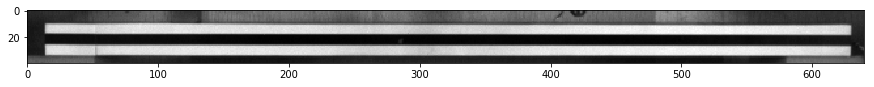

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(video.mraw[0], 'gray')

Points where the displacements will be identified must be determined. Chosen points must have high gradient value.

In [7]:
reference_image = np.average(video.mraw[:10], axis=0)

grad0, grad1 = np.gradient(reference_image)

In [8]:
inds = np.array([[ 26,  20],
               [ 18, 180],
               [ 26, 340],
               [ 26, 500]])

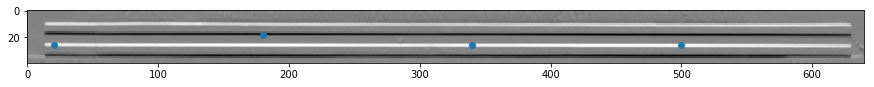

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(grad0, 'gray')
ax.scatter(inds[:, 1], inds[:, 0])

Setting the points:

In [10]:
video.set_points(points=inds, method='simplified_optical_flow')

If the `points` argument is not given, the `get_points` method is triggered.

In [11]:
displacements = video.get_displacements()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 75/75 [00:00<00:00, 1281.44it/s]


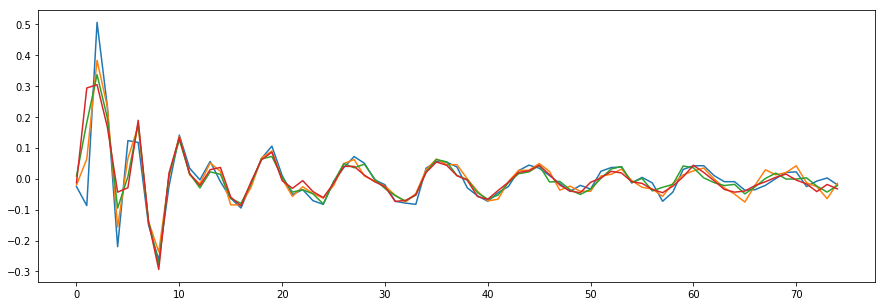

In [12]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(displacements);